In [85]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [86]:
# Data Source : http://www.statiz.co.kr/

picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [87]:
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [88]:
batter_features_df = batter[['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)']]

In [89]:
batter = batter.drop('BABIP', axis=1)

In [90]:
print(batter.columns)

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)', '연봉(2017)'],
      dtype='object')


In [91]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [92]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
#       print(col)
#        print(df[col].dtype)
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [93]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
        '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2017)']
batter_df = standard_scaling(batter, scale_columns)

In [108]:
batter_df = batter_df.rename(columns={'연봉(2018)': 'y'})
batter_df.head(5)

,선수명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,...,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화,예측연봉(2018)
0,최정,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,...,False,False,False,True,False,False,False,False,False,-0.529056
1,최형우,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,...,False,False,False,False,False,False,False,False,False,-0.447016
2,박건우,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,...,False,False,False,False,False,True,False,False,False,-0.406877
3,나성범,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,...,False,False,True,False,False,False,False,False,False,-0.038219
4,손아섭,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,...,False,False,False,False,False,False,True,False,False,-0.544748


In [109]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# 학습 데이터와 테스트 데이터로 분리합니다.
X = batter_df[batter_df.columns.difference(['선수명', 'y'])]
y = batter_df['y'] #2018년 연봉은 y로 놓음...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [112]:
print(result_df.columns)

Index(['index', '선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)'], dtype='object')


In [113]:
# 학습 데이터와 테스트 데이터로 분리합니다.
X = batter_df[batter_df.columns.difference(['선수명', 'y'])] # 선수명과 y를 뺀 것을 모두 X로 놓는다.
y = batter_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [116]:
#예측값을 예측연본(2018)에 추가
batter_df['예측연봉(2018)'] = pd.Series(y_predictions)

In [117]:
# 원래의 데이터 프레임을 다시 로드합니다.
batter = pd.read_csv(batter_file_path)
batter = batter[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
#result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df = batter_df
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(batter, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,2,박건우,37000,7614.178072,19500
1,3,나성범,43000,19403.449341,35000
2,4,손아섭,150000,3205.226012,65000
3,5,김선빈,28000,246780.857587,8000
4,7,박민우,32000,5584.059166,25000
5,8,김하성,32000,6745.065614,22000
6,9,스크럭스,70000,-130.616225,80000
7,10,러프,140000,16435.640968,110000
8,11,구자욱,25000,3363.646764,16000
9,12,안치홍,32000,990.956385,22000


<Axes: xlabel='선수명'>

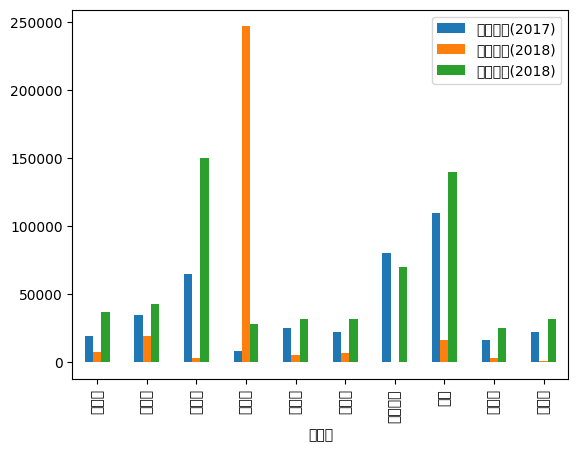

In [118]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
#mpl.rc('font', family='NanumGothicOTF')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")